# Imports

In [1]:
import numpy as np
import os

os.chdir('..')
from NEAT.organism import Organism
from NEAT.population import Population

# Population Testing

[[Node(0,L=0), Node(1,L=0), Node(2,L=0)], [Node(3,L=1), Node(4,L=1)]]
State
Neurons: 5 (2), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(3,L=1), Node(4,L=1)]}
Connections: 0, []



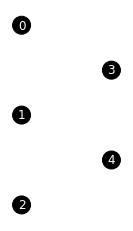

In [2]:
population = Population(1000, 2, 2)
population.initialize_population()
player = population.players[0]
print(list(player.neurons.values()))
player.print_state()
player.draw_state()

State
Neurons: 5 (2), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(3,L=1), Node(4,L=1)]}
Connections: 0, []



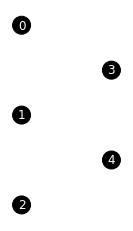

In [3]:
population.mutate()
player = population.players[0]
player.print_state()
player.draw_state()

In [4]:
population.speciate()
len(population.species)

2

In [7]:
population = Population(1000, 2, 2)

for _ in range(100):
    population.new_generation()
    print(len(population.players))
    for player in population.players:
        player.fitness = np.random.randint(0,10)
    population.update_generation()
    print("Innovations: %s" % len(population.innovation_history.innovations))
    print("Species: %d" % len(population.species))
    for i in range(len(population.species)):
        print("Species %d - Players: %d, Average Fitness: %.4f, Max Fitness: %.4f, Fittest Innovations: %d" % (i, len(population.species[i].players), population.species[i].average_fitness(), population.species[i].fittest_player.fitness, len(population.species[i].fittest_player.innovation_labels)))

1000
Innovations: 6
Species: 2


AttributeError: 'Organism' object has no attribute 'innovations'

# Iteration Test

In [6]:
population = Population(1000, 2, 2)
players = population.new_generation()
won = play_game(players)
for i in range(len(players)):
    players[i].fitness = won[i]
population.update_generation()

print("Innovations: %s" % len(population.innovation_history))
print("Species: %d" % len(population.species))
for i in range(len(population.species)):
    print("Species %d - Players: %d, Average Fitness: %.4f, Max Fitness: %.4f" % (i, len(population.species[i].players), population.species[i].average_fitness, population.species[i].max_fitness))

NameError: name 'play_game' is not defined

In [ ]:
players = population.new_generation()
won = play_game(players)
for i in range(len(players)):
    players[i].fitness = won[i]
population.update_generation()

print("Innovations: %s" % len(population.innovation_history))
print("Species: %d" % len(population.species))
for i in range(len(population.species)):
    print("Species %d - Players: %d, Average Fitness: %.4f, Max Fitness: %.4f" % (i, len(population.species[i].players), population.species[i].average_fitness, population.species[i].max_fitness))

Innovations: 52
Species: 10
Species 0 - Players: 51, Average Fitness: 55.1176, Max Fitness: 78.0000
Species 1 - Players: 52, Average Fitness: 53.1731, Max Fitness: 74.0000
Species 2 - Players: 46, Average Fitness: 54.7174, Max Fitness: 73.0000
Species 3 - Players: 51, Average Fitness: 55.0000, Max Fitness: 71.0000
Species 4 - Players: 52, Average Fitness: 53.8269, Max Fitness: 70.0000
Species 5 - Players: 51, Average Fitness: 53.9608, Max Fitness: 64.0000
Species 6 - Players: 46, Average Fitness: 54.5435, Max Fitness: 64.0000
Species 7 - Players: 51, Average Fitness: 53.9216, Max Fitness: 63.0000
Species 8 - Players: 53, Average Fitness: 53.4340, Max Fitness: 62.0000
Species 9 - Players: 55, Average Fitness: 53.2909, Max Fitness: 61.0000


# Training Test

In [ ]:
num_iters = 100
print_step = 5
population_size = 1000
num_inputs = 2
num_outputs = 2
max_hits_threshold = 5

max_hits = 0

population = Population(population_size, num_inputs, num_outputs)

for iteration in range(num_iters):
    players = population.new_generation()
    won = play_game(players)
    for i in range(len(players)):
        players[i].fitness = won[i]
    population.update_generation()
    if iteration % print_step == 0:
        print("Iteration: %d, Innovations: %s, Species: %d, Average Fitness: %.4f, Max Fitness: %.4f" % (iteration, len(population.innovation_history), len(population.species), population.sum_average_fitness / len(population.species), population.max_fitness))
    elif population.max_fitness == 100:
        print("Iteration: %d, Innovations: %s, Species: %d, Average Fitness: %.4f, Max Fitness: %.4f" % (iteration, len(population.innovation_history), len(population.species), population.sum_average_fitness / len(population.species), population.max_fitness))
        max_hits += 1
    else:
        max_hits = 0
    if max_hits == max_hits_threshold:
        max_player = population.species[0].players[0]
        break

Iteration: 0, Innovations: 15, Species: 9, Average Fitness: 52.5827, Max Fitness: 66.0000
Iteration: 5, Innovations: 126, Species: 18, Average Fitness: 64.5774, Max Fitness: 86.0000
Iteration: 10, Innovations: 201, Species: 26, Average Fitness: 70.5221, Max Fitness: 90.0000
Iteration: 15, Innovations: 285, Species: 34, Average Fitness: 73.7020, Max Fitness: 88.0000
Iteration: 20, Innovations: 364, Species: 39, Average Fitness: 72.9723, Max Fitness: 87.0000
Iteration: 24, Innovations: 414, Species: 45, Average Fitness: 75.0981, Max Fitness: 100.0000
Iteration: 25, Innovations: 427, Species: 48, Average Fitness: 73.9813, Max Fitness: 100.0000
Iteration: 26, Innovations: 438, Species: 49, Average Fitness: 73.6720, Max Fitness: 100.0000
Iteration: 27, Innovations: 455, Species: 52, Average Fitness: 73.2727, Max Fitness: 100.0000
Iteration: 28, Innovations: 463, Species: 51, Average Fitness: 73.9474, Max Fitness: 100.0000
Iteration: 29, Innovations: 470, Species: 54, Average Fitness: 74.721

[1, 0, 0] [0.5918880387806611, 0.5772491376470447] 0
[1, 0, 1] [0.5914726080190821, 0.6348668045780392] 1
[1, 1, 0] [0.587421524507379, 0.6265880711287929] 1
[1, 1, 1] [0.6338225668561569, 0.630986946400547] 0
	State
	Nodes: 6 (3), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(5,L=1)], 2: [Node(3,L=2), Node(4,L=2)]}
	Connections: 10, [Gene(Node(1,L=0)->Node(3,L=2),W=-0.0916,I=1,E=1), Gene(Node(1,L=0)->Node(5,L=1),W=-0.9720,I=12,E=1), Gene(Node(0,L=0)->Node(5,L=1),W=0.2631,I=14,E=1), Gene(Node(0,L=0)->Node(4,L=2),W=0.2288,I=41,E=1), Gene(Node(2,L=0)->Node(5,L=1),W=0.7689,I=87,E=1), Gene(Node(0,L=0)->Node(3,L=2),W=0.4449,I=119,E=1), Gene(Node(1,L=0)->Node(4,L=2),W=0.2888,I=210,E=1), Gene(Node(2,L=0)->Node(3,L=2),W=0.2120,I=396,E=1), Gene(Node(5,L=1)->Node(3,L=2),W=-0.2780,I=13,E=1), Gene(Node(5,L=1)->Node(4,L=2),W=0.3143,I=181,E=1)]




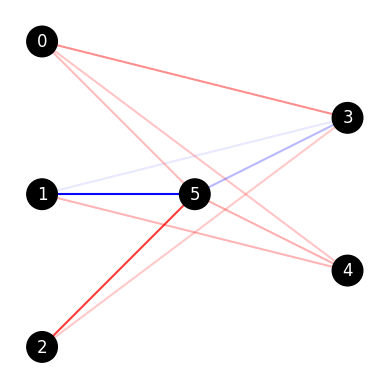

In [ ]:
for i in range(4):
    inputs = [1, 0 if i < 2 else 1, 0 if i % 2 == 0 else 1]
    decision = max_player.decide(inputs)
    print(inputs, max_player.nn.forward_pass(inputs), decision)
max_player.nn.print_state()
max_player.nn.draw_state()

[1, 0, 0] [0.5, 0.5] 0
[1, 0, 1] [0.35989515198666705, 0.5] 1
[1, 1, 0] [0.4526932296015555, 0.5] 1
[1, 1, 1] [0.3174286460478809, 0.5] 1
	State
	Nodes: 7 (3), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(5,L=1), Node(6,L=1)], 2: [Node(3,L=2), Node(4,L=2)]}
	Connections: 9, [Gene(Node(2,L=0)->Node(3,L=2),W=-0.5758,I=3,E=1), Gene(Node(2,L=0)->Node(5,L=1),W=-0.3210,I=6,E=1), Gene(Node(0,L=0)->Node(5,L=1),W=-0.2055,I=8,E=1), Gene(Node(1,L=0)->Node(3,L=2),W=-0.1898,I=37,E=1), Gene(Node(1,L=0)->Node(6,L=1),W=0.0349,I=63,E=1), Gene(Node(0,L=0)->Node(6,L=1),W=-0.9842,I=65,E=1), Gene(Node(5,L=1)->Node(3,L=2),W=0.1090,I=7,E=1), Gene(Node(6,L=1)->Node(3,L=2),W=-0.4705,I=64,E=1), Gene(Node(5,L=1)->Node(4,L=2),W=-0.7291,I=152,E=1)]




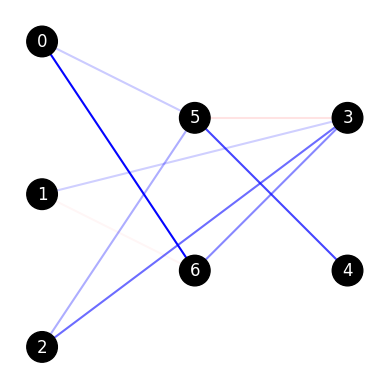

In [ ]:
player = population.species[np.random.randint(len(population.species))].players[0]
while player.nn.num_nodes < 7:
    player = population.species[np.random.randint(len(population.species))].players[0]
for i in range(4):
    inputs = [1, 0 if i < 2 else 1, 0 if i % 2 == 0 else 1]
    decision = player.decide(inputs)
    print(inputs, player.nn.forward_pass(inputs), decision)
player.nn.print_state()
player.nn.draw_state()